# Étape 1 : Chargement et nettoyage des données
### Nous commencerons par charger le dataset, examiner sa structure, identifier et traiter les valeurs manquantes, et enlever les colonnes inutiles.

In [1]:
import pandas as pd
import numpy as np

# Chargement des données
df = pd.read_csv('./MP-4MLSP.csv')

# Aperçu des premières lignes et des informations du dataframe
print(df.head())
print(df.info())

# Identifier et traiter les valeurs manquantes
print(df.isnull().sum())

# Suppression des colonnes inutiles
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

# Imputation des valeurs manquantes
# Exemple: Imputation par la médiane pour les variables numériques
for col in ['Age', 'Ease of Online booking', 'Gate location', 'Leg room service', 'Arrival Delay in Minutes']:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True)

# Vérifier encore les informations pour s'assurer que les valeurs manquantes sont traitées
print(df.isnull().sum())


   Unnamed: 0      id  Gender      Customer Type   Age   Type of Travel  \
0           0   19149  Female  disloyal Customer  19.0  Business travel   
1           1   69112    Male     Loyal Customer  54.0  Business travel   
2           2    4725  Female  disloyal Customer  23.0  Business travel   
3           3  115546    Male     Loyal Customer  58.0  Business travel   
4           4   59440    Male     Loyal Customer  45.0  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco            353.0                      3   
1  Eco Plus           1088.0                      5   
2  Business            977.0                      2   
3  Business           2932.0                      2   
4       Eco            667.0                      1   

   Departure/Arrival time convenient  ...  On-board service  Leg room service  \
0                                  4  ...                 5               5.0   
1                                  2  ...               

C:\Users\anasa\AppData\Local\Temp\ipykernel_31112\1415131434.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\anasa\AppData\Local\Temp\ipykernel_31112\1415131434.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

# Étape 2 : Analyse exploratoire des données
### Après le nettoyage, nous allons visualiser les distributions des variables, les relations entre les variables explicatives et les variables cibles.

In [2]:
df["Gender"].value_counts()

Gender
Female    65899
Male      63981
Name: count, dtype: int64

In [3]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

In [4]:
# Groupement des données par classe et description des prix
class_price_description = df.groupby('Class')['Price'].describe()

# Affichage de la description
print(class_price_description)

            count         mean         std    min     25%     50%     75%  \
Class                                                                       
Business  62160.0  2877.458542  854.575011  424.0  2296.0  2982.0  3544.0   
Eco       58309.0   877.895745  324.657039  141.0   632.0   879.0  1122.0   
Eco Plus   9411.0  1542.092658  567.681618  301.0  1111.0  1538.0  1968.0   

             max  
Class             
Business  4726.0  
Eco       1827.0  
Eco Plus  3087.0  


In [5]:
# Groupement des données par satisfaction et age
satisfaction_age_description = df.groupby('satisfaction')['Age'].describe()

# Affichage de la description
print(satisfaction_age_description)

                count       mean        std  min   25%   50%   75%   max
satisfaction                                                            
dissatisfied  37349.0  33.140486  12.770188  6.0  22.0  32.0  41.0  76.0
neutral       36103.0  34.621721  16.626302  6.0  20.0  34.0  49.0  63.0
satisfied     56428.0  37.558021  11.508074  6.0  29.0  39.0  46.0  76.0


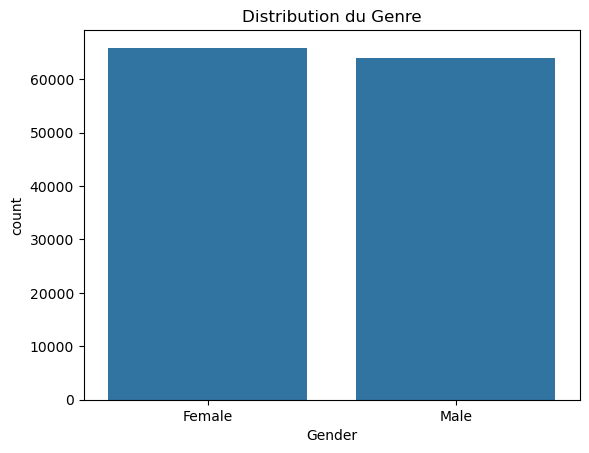

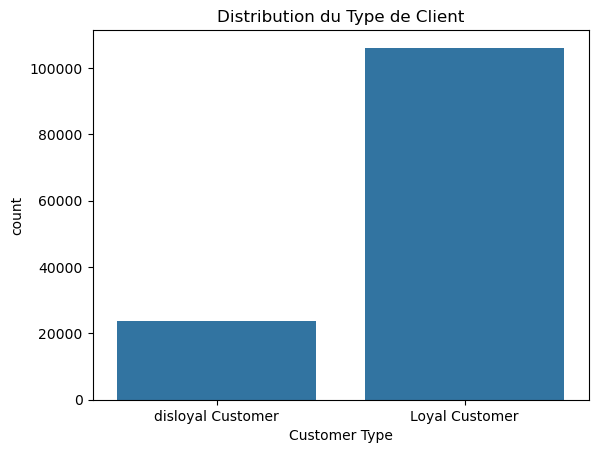

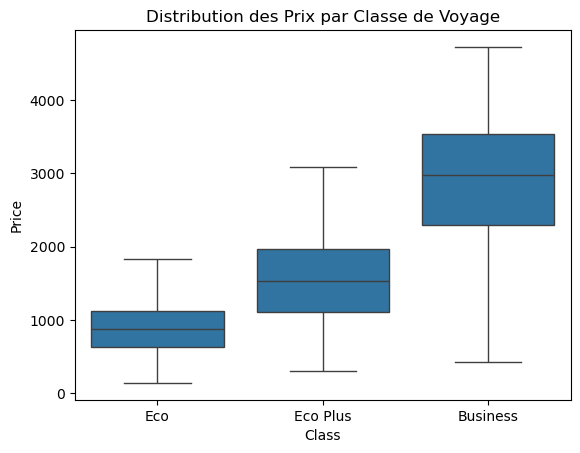

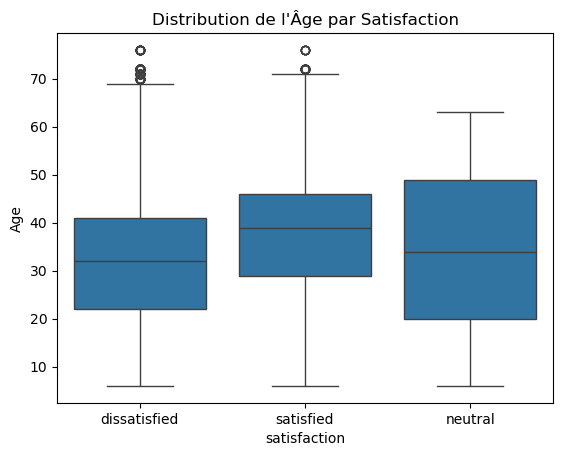

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution des variables catégorielles
sns.countplot(x='Gender', data=df)
plt.title('Distribution du Genre')
plt.show()

sns.countplot(x='Customer Type', data=df)
plt.title('Distribution du Type de Client')
plt.show()

# Boxplots pour visualiser la distribution des prix en fonction des classes
sns.boxplot(x='Class', y='Price', data=df)
plt.title('Distribution des Prix par Classe de Voyage')
plt.show()

# Relation entre la satisfaction et les autres variables
sns.boxplot(x='satisfaction', y='Age', data=df)
plt.title('Distribution de l\'Âge par Satisfaction')
plt.show()

# plt.ylim(0, 20)  # Vous pouvez ajuster les limites selon vos besoins

### Visualisation des Données

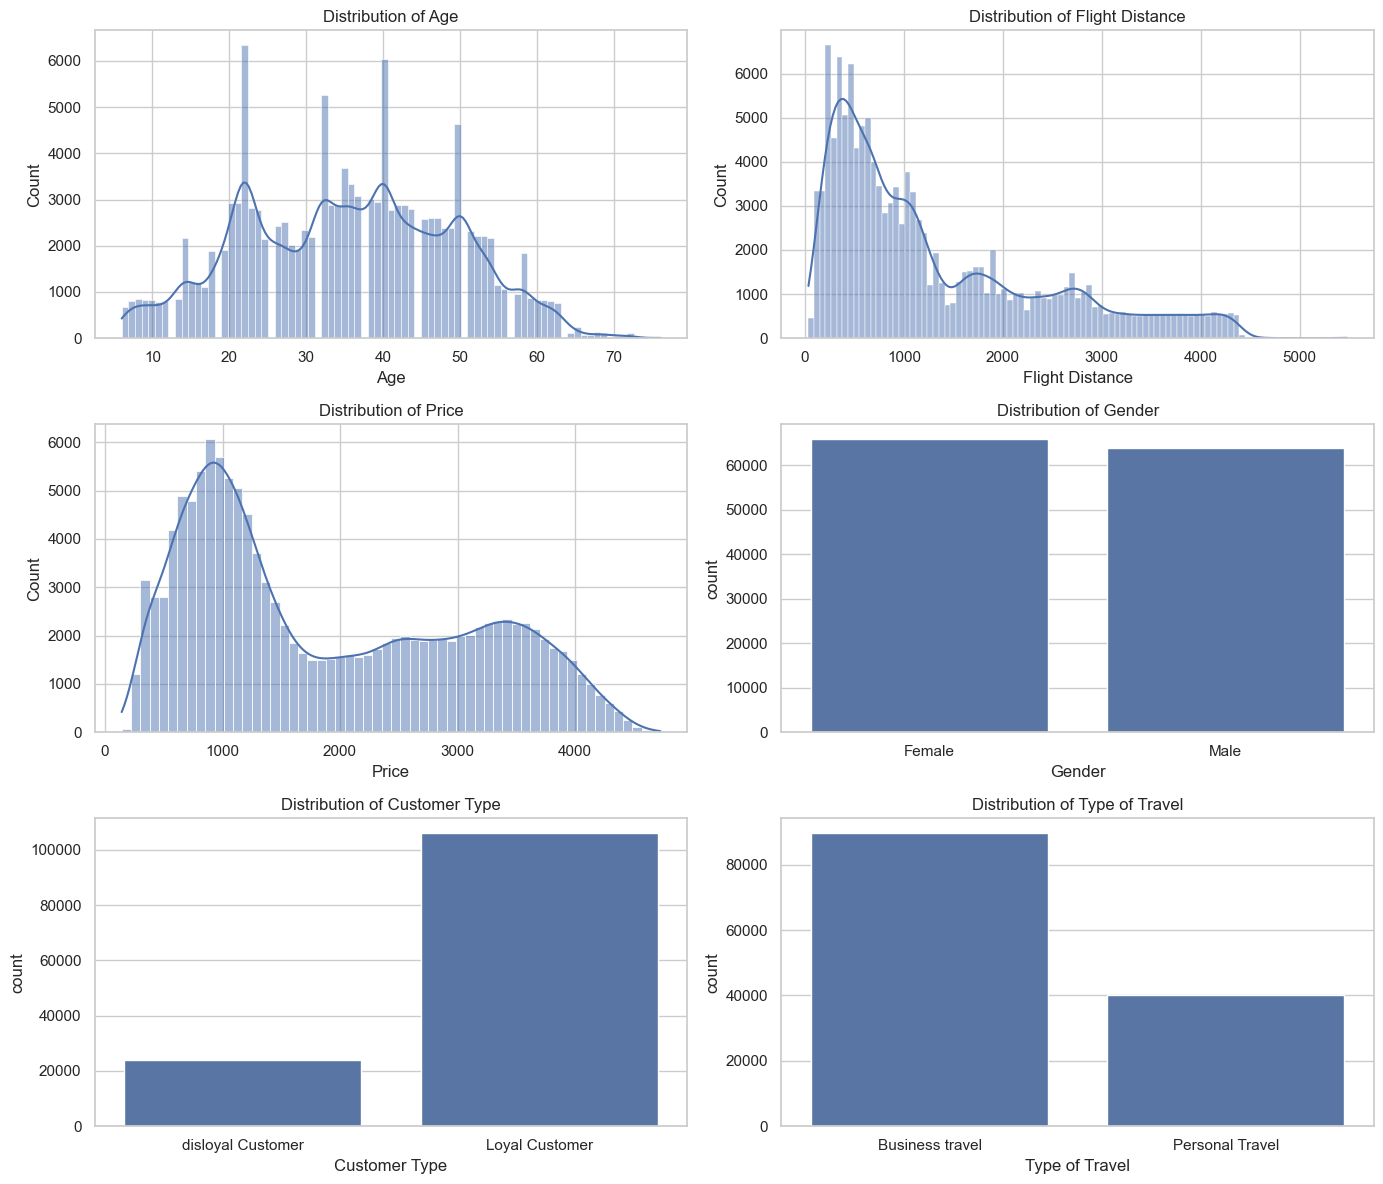

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to hold the plots
fig, ax = plt.subplots(3, 2, figsize=(14, 12))

# Histograms for continuous variables
sns.histplot(df['Age'], kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Age')

sns.histplot(df['Flight Distance'], kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Flight Distance')

sns.histplot(df['Price'], kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Price')

# Bar plots for categorical variables
sns.countplot(x='Gender', data=df, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Gender')

sns.countplot(x='Customer Type', data=df, ax=ax[2, 0])
ax[2, 0].set_title('Distribution of Customer Type')

sns.countplot(x='Type of Travel', data=df, ax=ax[2, 1])
ax[2, 1].set_title('Distribution of Type of Travel')

# Adjust layout
plt.tight_layout()
plt.show()

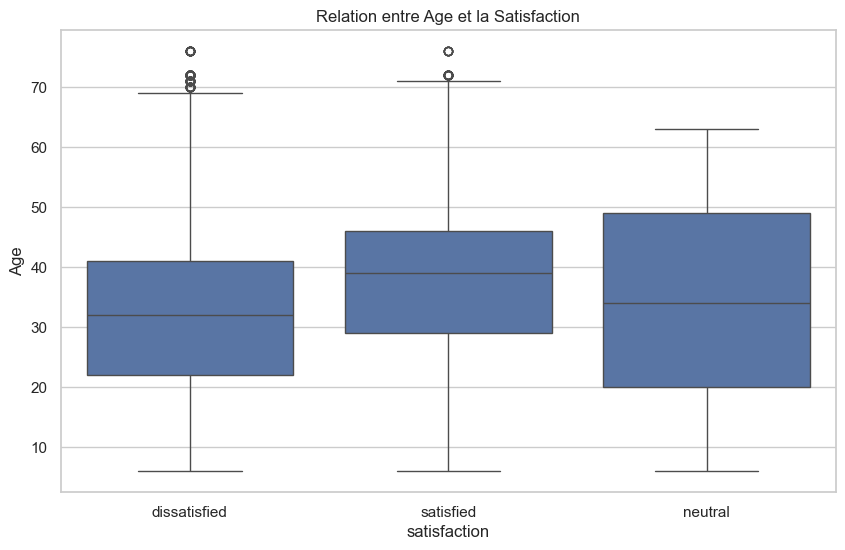

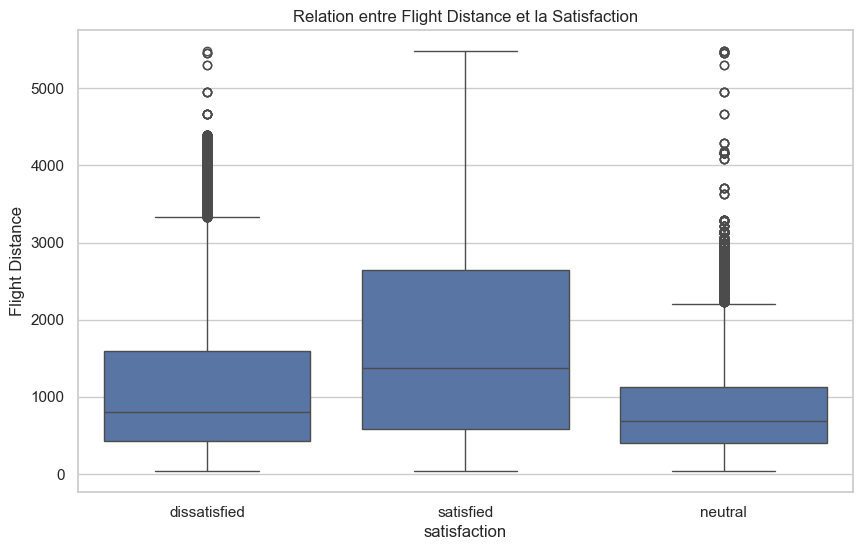

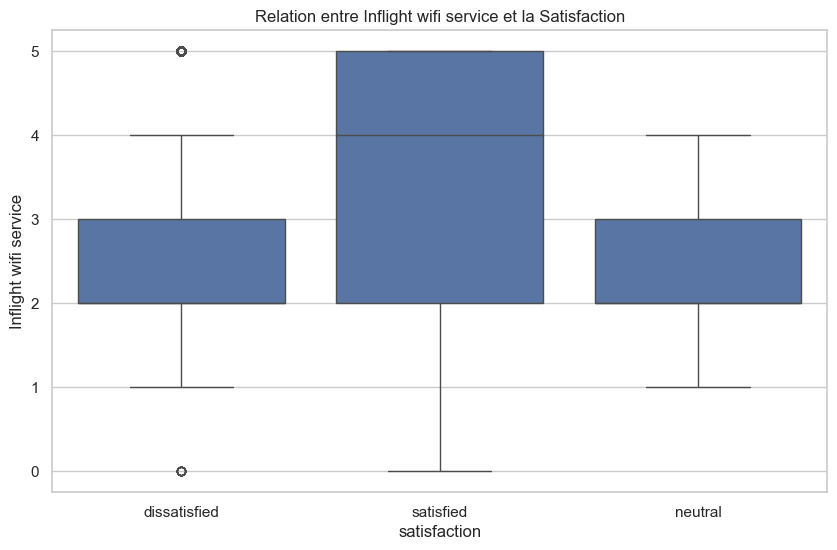

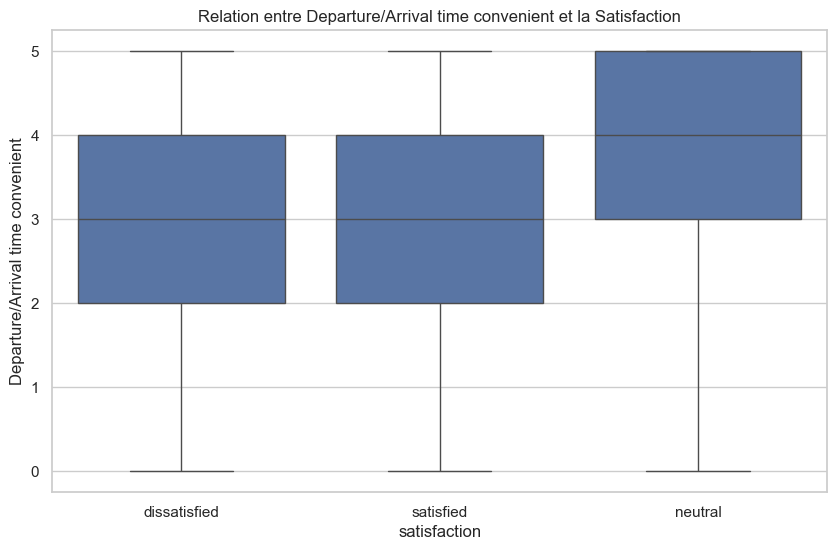

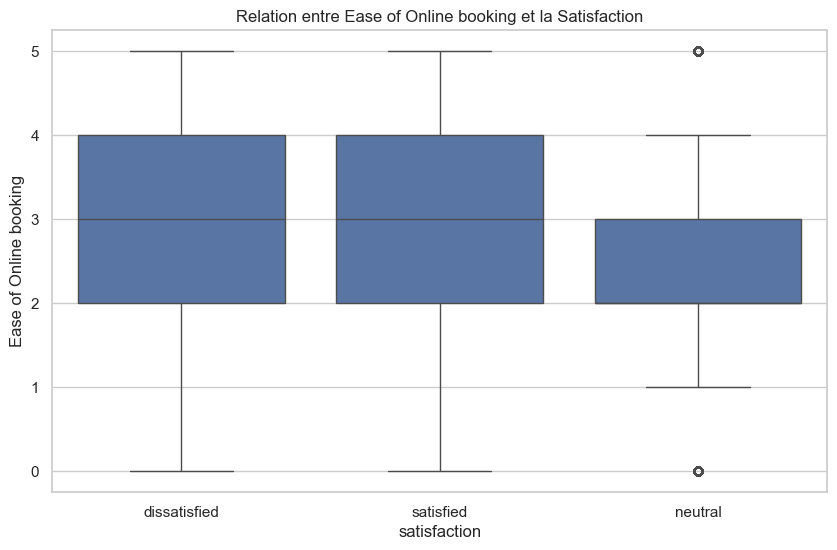

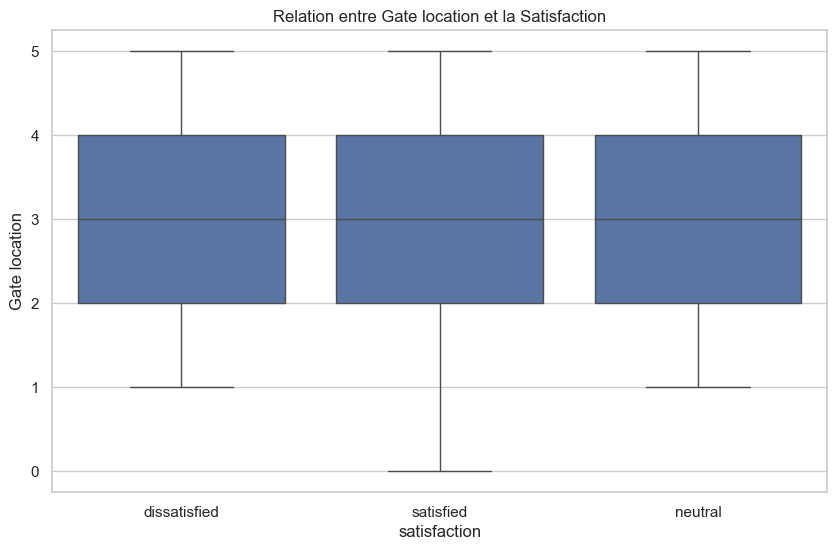

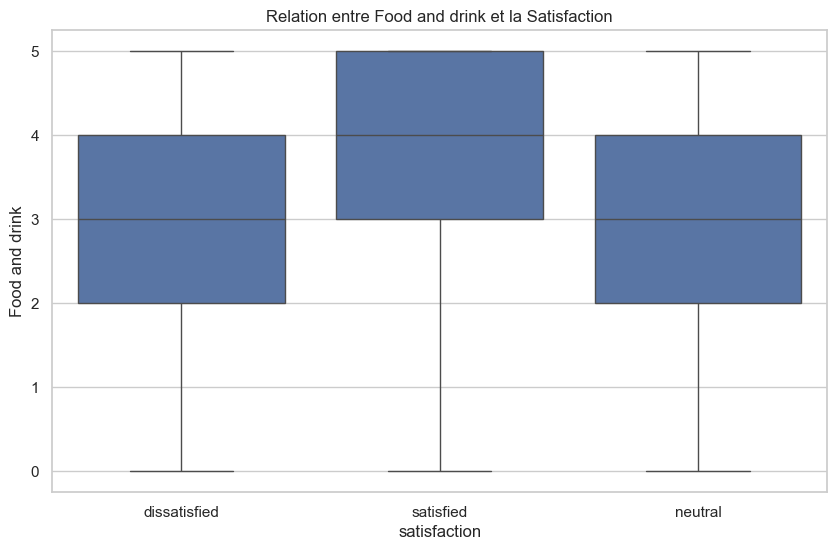

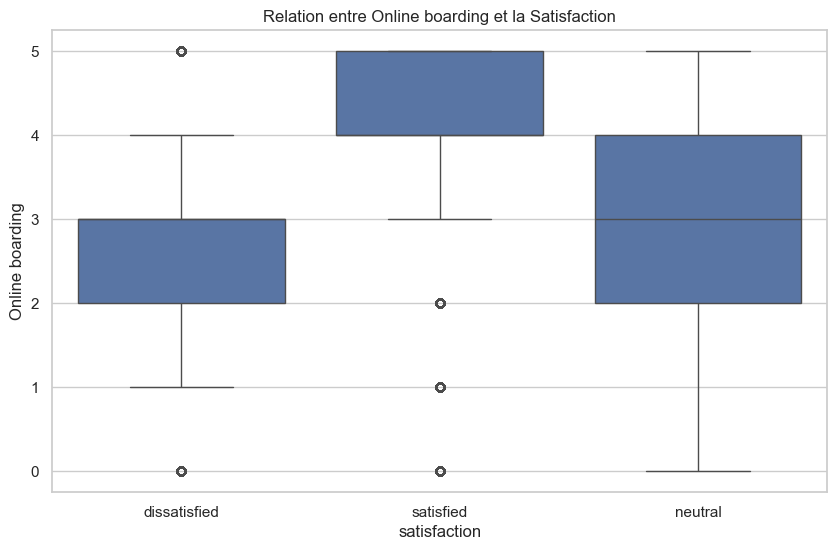

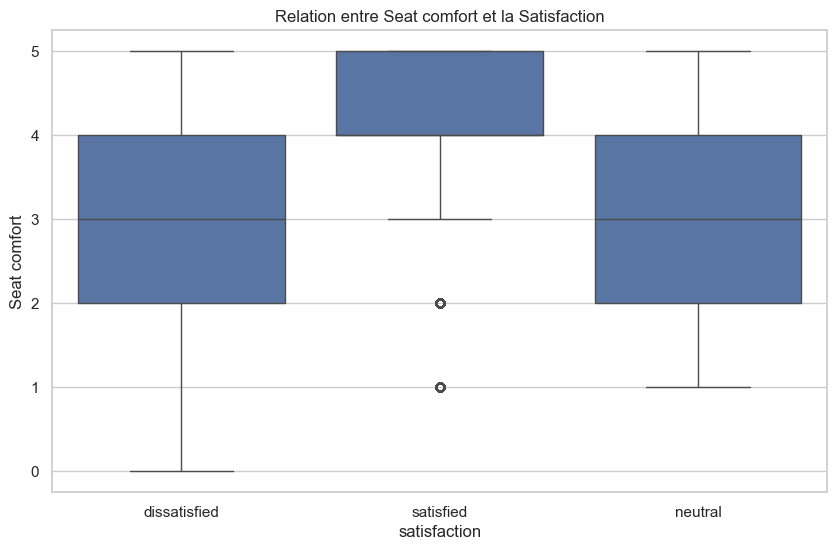

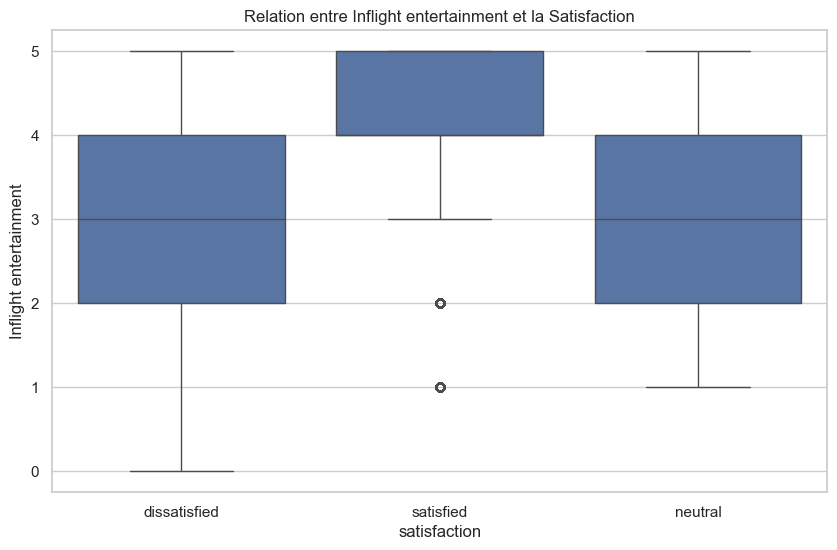

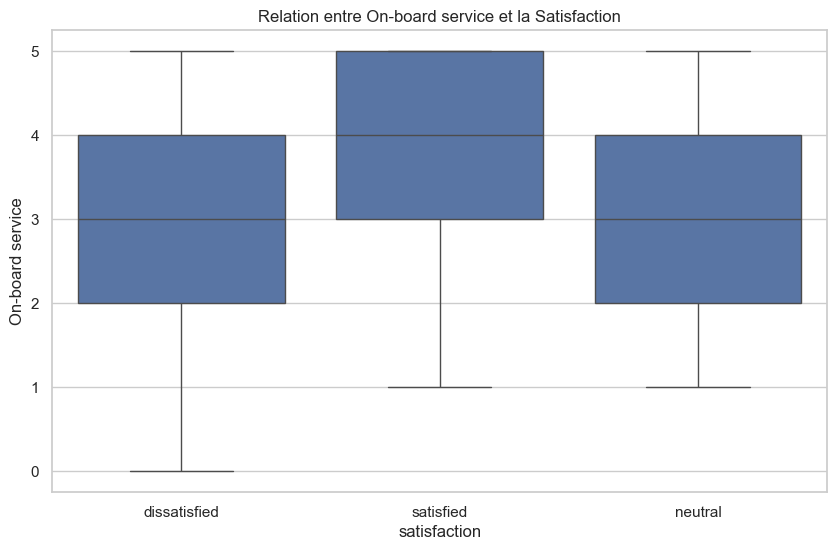

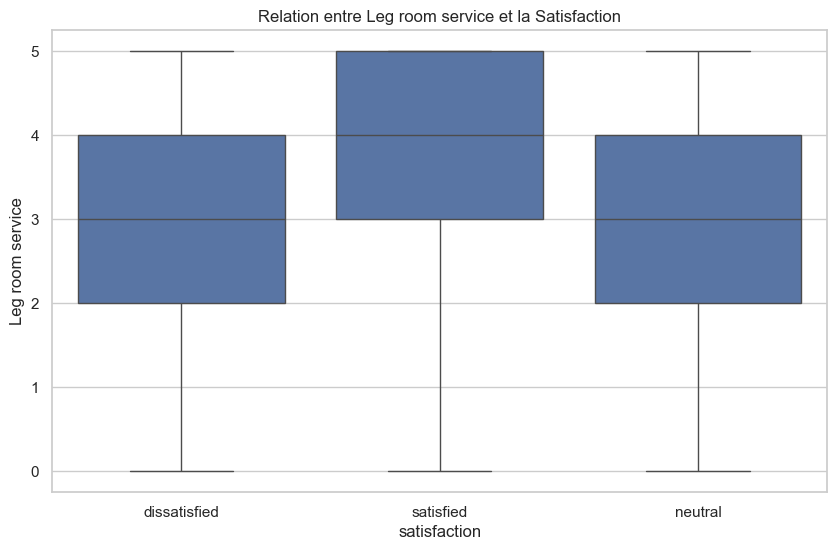

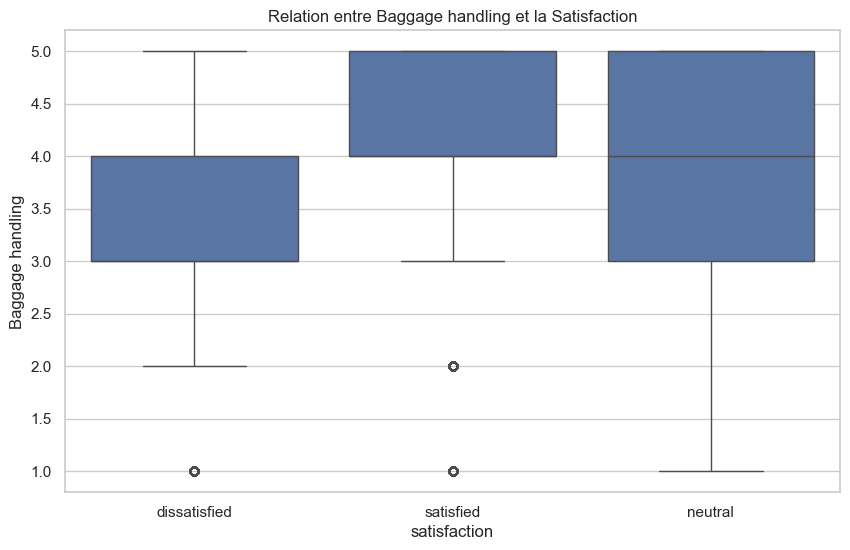

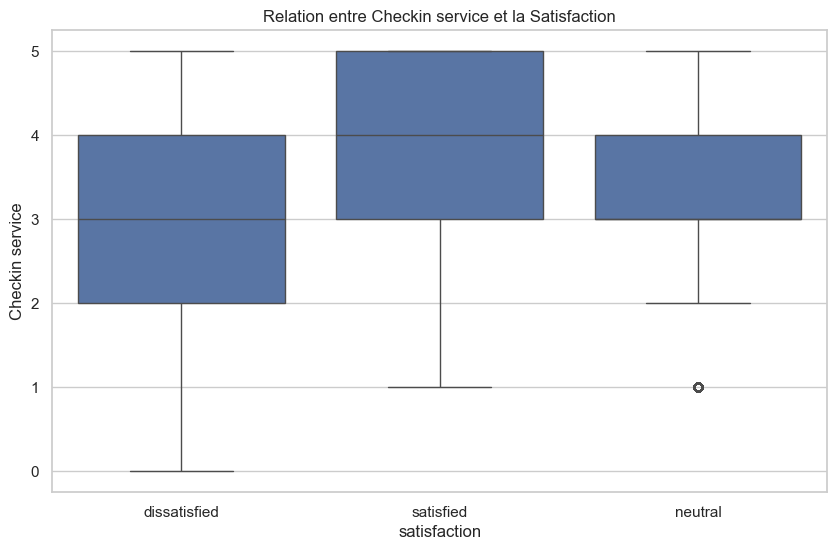

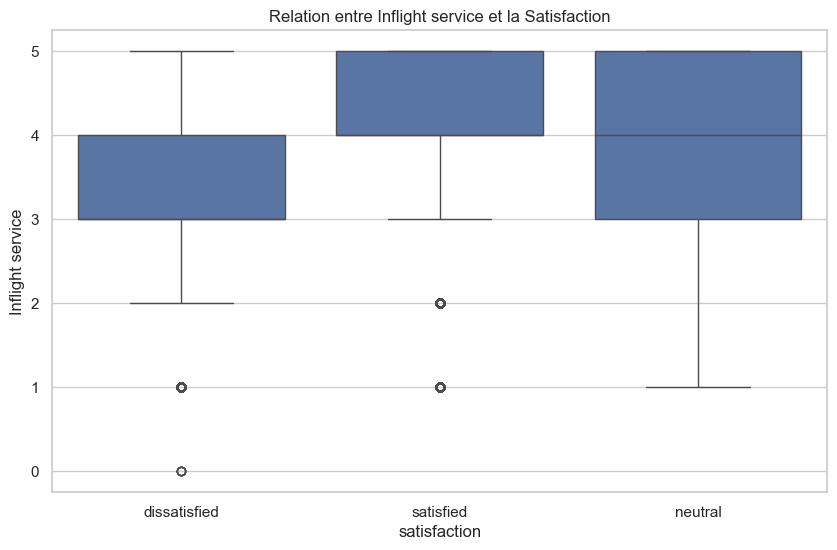

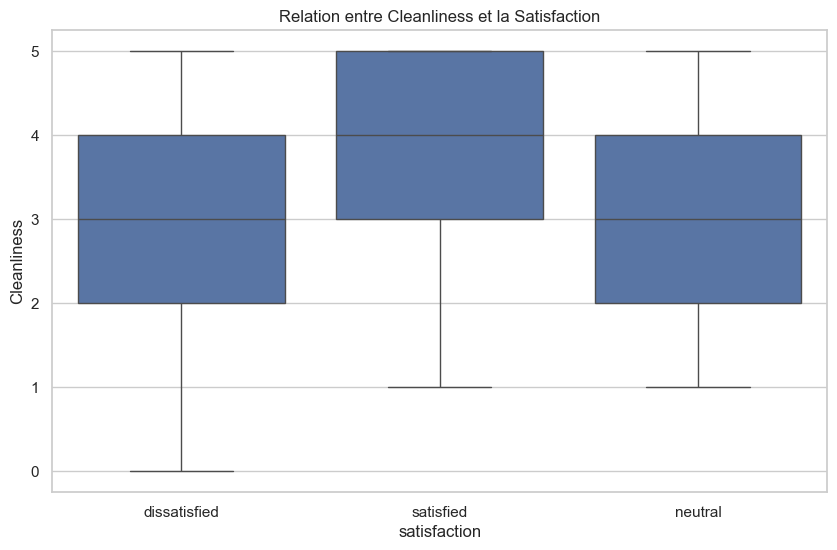

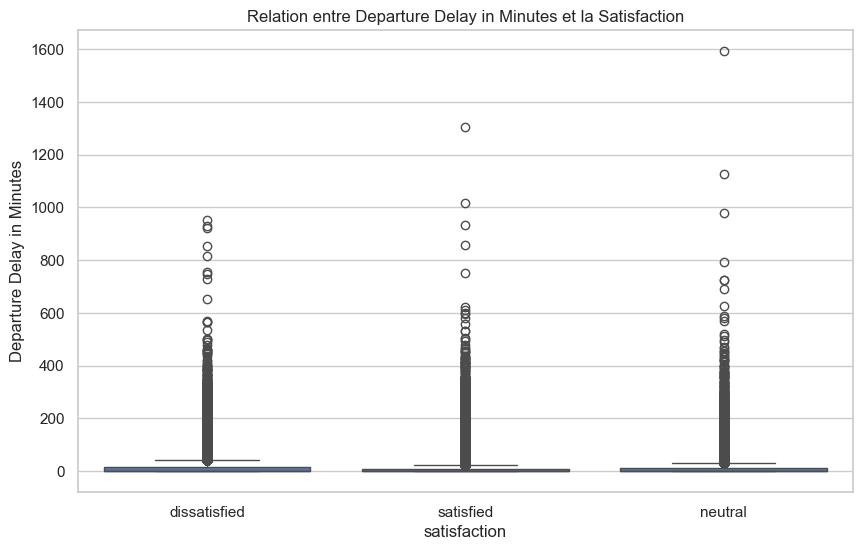

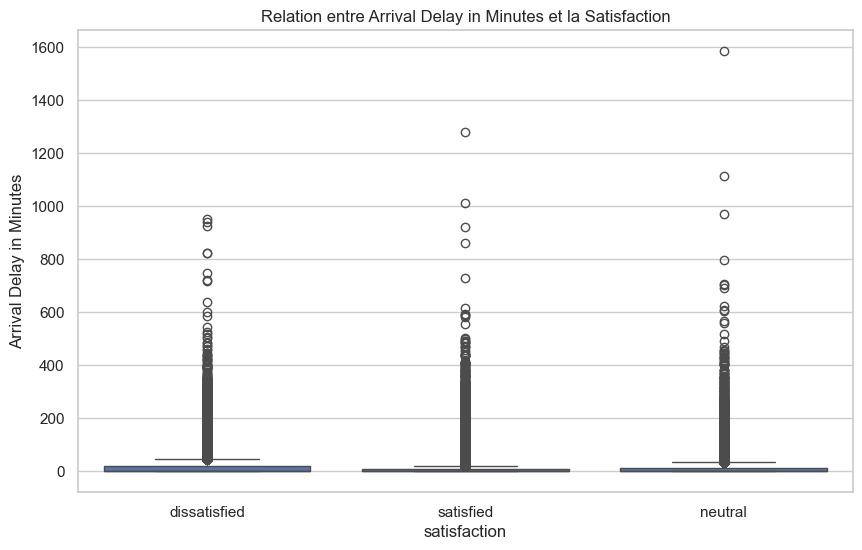

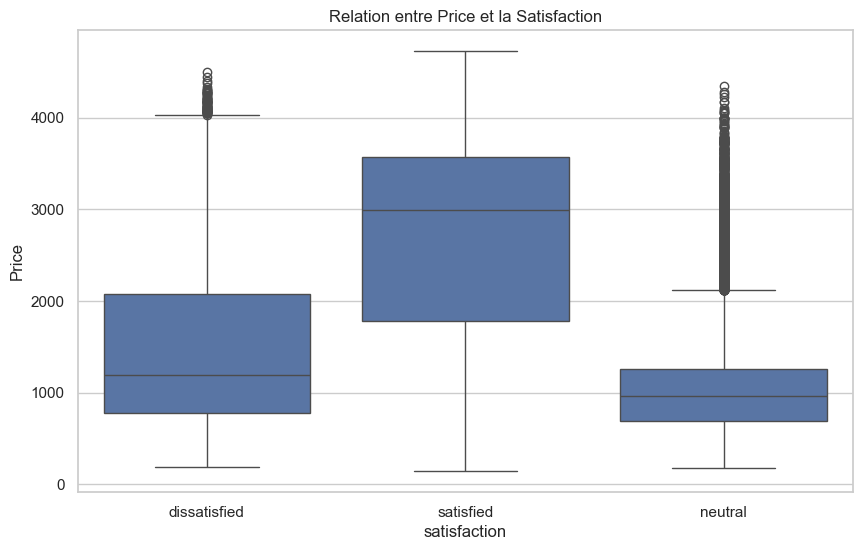

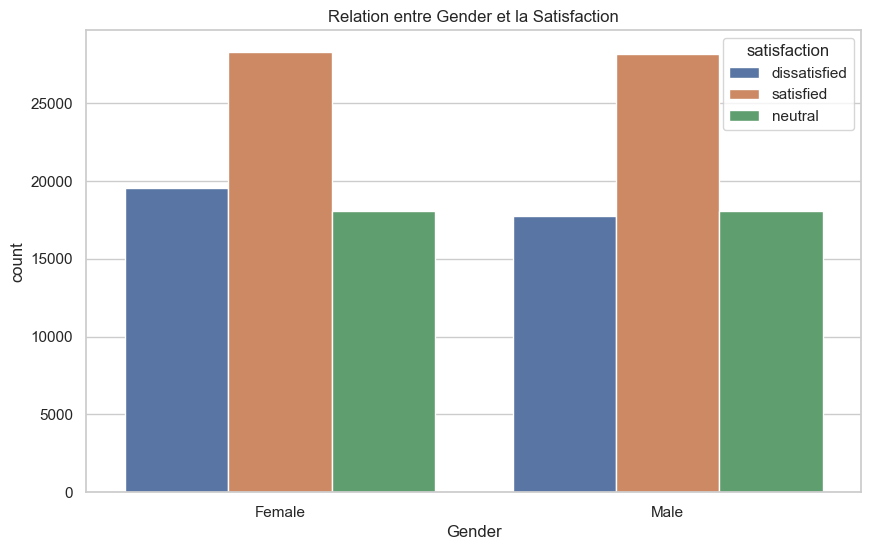

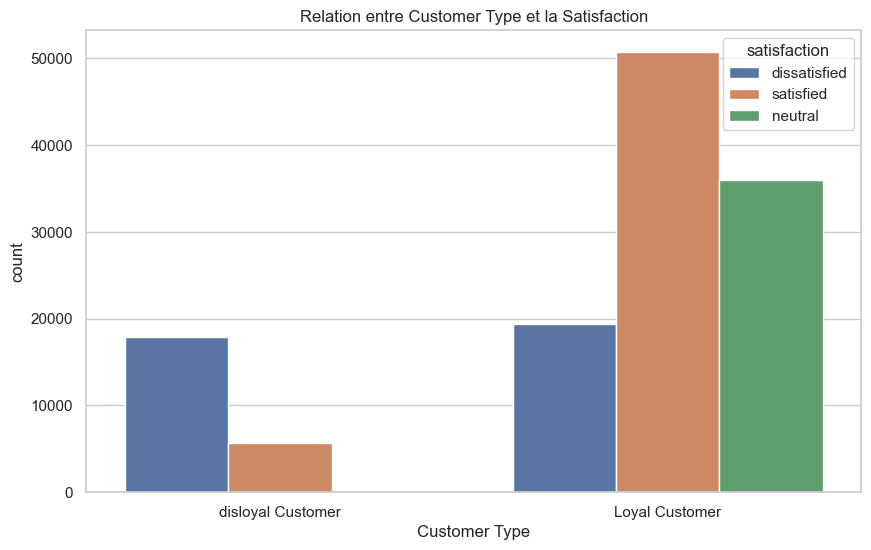

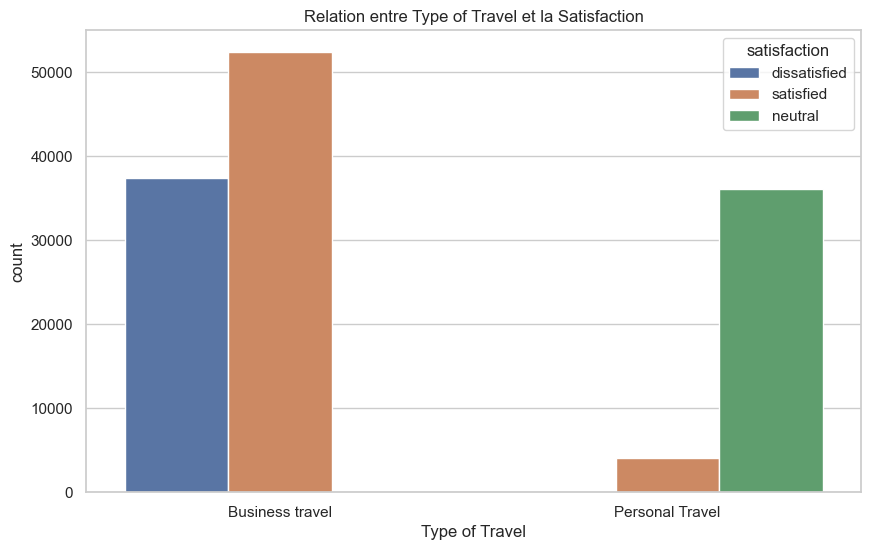

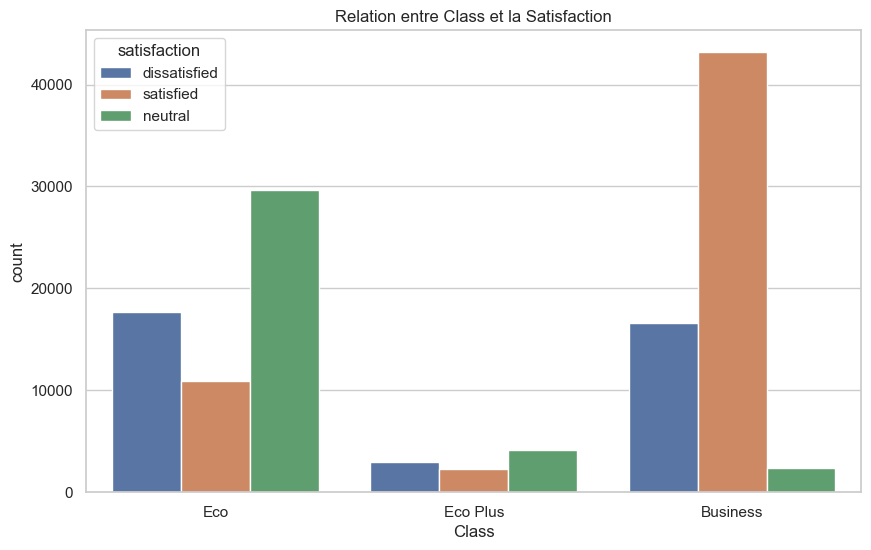

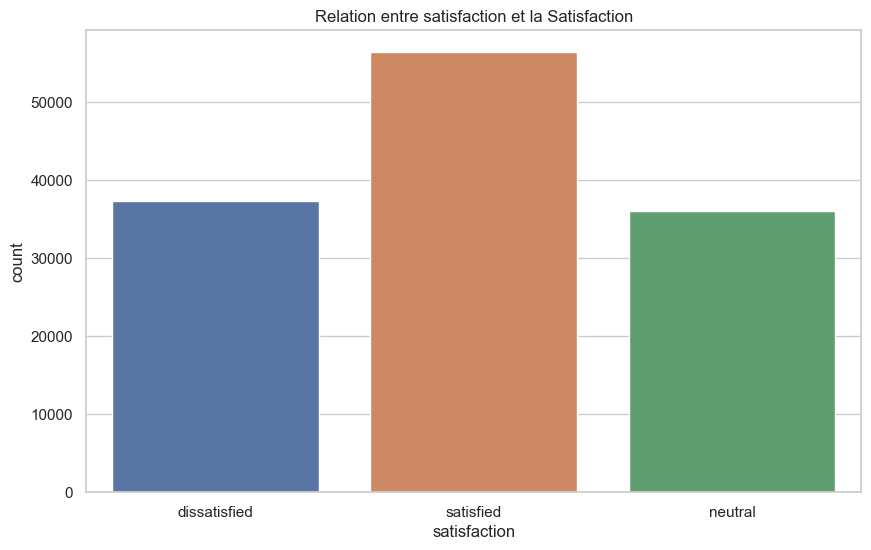

In [8]:
# Relations entre les variables numériques et la satisfaction
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='satisfaction', y=col)
    plt.title(f'Relation entre {col} et la Satisfaction')
    plt.show()

# Relations entre les variables catégorielles et la satisfaction
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='satisfaction')
    plt.title(f'Relation entre {col} et la Satisfaction')
    plt.show()

### 1. Test t de Student
### Comparer les âges des clients satisfaits et insatisfaits :

In [9]:
from scipy.stats import ttest_ind

satisfied_age = df[df['satisfaction'] == 'satisfied']['Age']
dissatisfied_age = df[df['satisfaction'] == 'dissatisfied']['Age']

t_stat, p_value = ttest_ind(satisfied_age, dissatisfied_age)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 55.064924944022756, P-value: 0.0


Conclusion : Les âges des clients satisfaits et insatisfaits sont significativement différents.

### 2. Test du Chi-deux
### Vérifier l'association entre le type de client et la satisfaction :

In [10]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Customer Type'], df['satisfaction'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, P-value: {p}")

Chi2: 32248.59327330478, P-value: 0.0


Conclusion : Il existe une association significative entre le type de client (loyal ou non) et la satisfaction.

### 3. ANOVA (Analyse de la variance)
### Comparer les prix entre les différentes classes :

In [11]:
from scipy.stats import f_oneway

eco_prices = df[df['Class'] == 'Eco']['Price']
eco_plus_prices = df[df['Class'] == 'Eco Plus']['Price']
business_prices = df[df['Class'] == 'Business']['Price']

f_stat, p_value = f_oneway(eco_prices, eco_plus_prices, business_prices)
print(f"F-statistic: {f_stat}, P-value: {p_value}")

F-statistic: 144545.0196514146, P-value: 0.0


Conclusion : Les prix des billets diffèrent significativement entre les classes Eco, Eco Plus et Business.

### 4. Coefficient de corrélation de Pearson
### Vérifier la corrélation entre l'âge et le prix :

In [12]:
from scipy.stats import pearsonr

age = df['Age']
price = df['Price']

correlation, p_value = pearsonr(age, price)
print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

Pearson Correlation: 0.1744102103526226, P-value: 0.0


Conclusion : Il existe une faible mais significative corrélation positive entre l'âge et le prix payé par les clients.

### Résumé des conclusions:
Test t de Student : Les âges des clients satisfaits et insatisfaits sont significativement différents.
Test du Chi-deux : Il existe une association significative entre le type de client (loyal ou non) et la satisfaction.
ANOVA : Les prix des billets diffèrent significativement entre les classes Eco, Eco Plus et Business.
Coefficient de corrélation de Pearson : Il existe une faible mais significative corrélation positive entre l'âge et le prix payé.

# Étape 2 (suite) : Analyse Exploratoire des Données (AED)
### Visualisation des relations et des corrélations
### Pour comprendre mieux les relations entre les variables et notamment leur impact sur les variables cibles 'Satisfaction' et 'Price', nous allons créer des visualisations plus spécifiques.

# Étape 1: Convertir les variables catégorielles en numériques
### Avant de calculer la matrice de corrélation, nous devons transformer toutes les variables catégorielles en variables numériques en utilisant un encodage approprié. L'encodage One-Hot est une méthode commune pour ce faire, mais pour les besoins de la matrice de corrélation, un encodage de label simple pourrait être plus approprié pour conserver la structure de DataFrame.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Créer une copie du DataFrame pour éviter de modifier les données originales
df_numeric = df.copy()

# Liste des colonnes catégorielles
categorical_cols = df_numeric.select_dtypes(include=['object']).columns

# Appliquer LabelEncoder à chaque colonne catégorielle
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_numeric[col] = label_encoder.fit_transform(df_numeric[col])

# Vérifier le nouveau DataFrame
print(df_numeric.head())

   Gender  Customer Type   Age  Type of Travel  Class  Flight Distance  \
0       0              1  19.0               0      1            353.0   
1       1              0  54.0               0      2           1088.0   
2       0              1  23.0               0      0            977.0   
3       1              0  58.0               0      0           2932.0   
4       1              0  45.0               0      1            667.0   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      5                                  2   
2                      2                                  0   
3                      2                                  3   
4                      1                                  0   

   Ease of Online booking  Gate location  ...  On-board service  \
0                     3.0            4.0  ...                 5   
1                     2.0            2.0  

# Étape 2: Recalculer la matrice de corrélation
### Maintenant que toutes nos données sont numériques, nous pouvons recalculer la matrice de corrélation sans rencontrer l'erreur précédente.

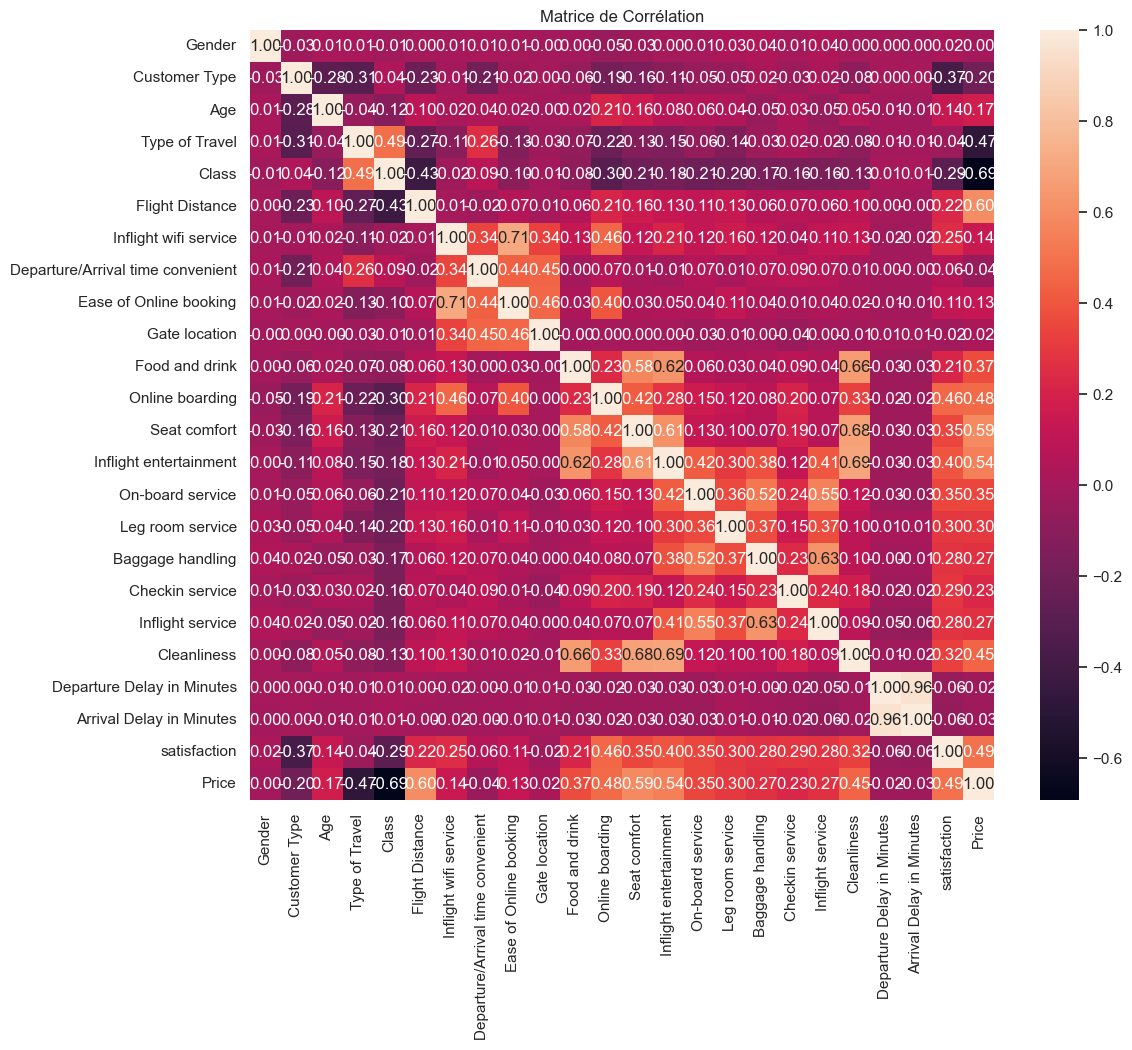

In [14]:
# Corrélation entre les variables numériques et 'Price'
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

# Étape 3: Visualisation des relations spécifiques
### Ensuite, nous vérifions les relations spécifiques entre les variables, comme l'âge et le prix, tout en colorant par satisfaction.

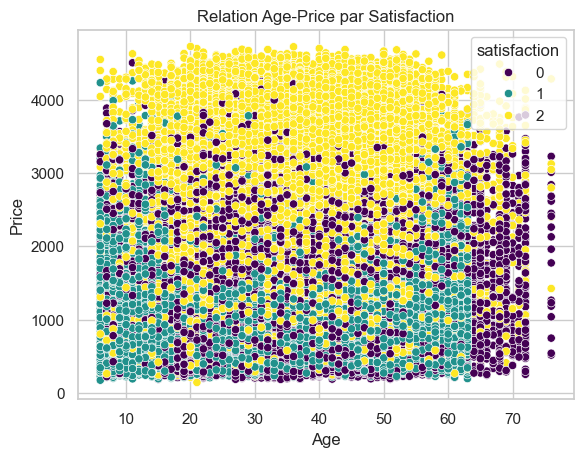

In [15]:
# Assurer que 'Satisfaction' est numérique si nécessaire
df_numeric['Satisfaction'] = label_encoder.fit_transform(df['satisfaction'])

# Visualisation de la relation spécifique
sns.scatterplot(x='Age', y='Price', hue='satisfaction', data=df_numeric, palette='viridis')
plt.title('Relation Age-Price par Satisfaction')
plt.show()

### Étape 2 : Prétraitement des Données
### Sélection des Variables Explicatives
### Nous allons essayer différentes sélections de variables explicatives et appliquer plusieurs stratégies d'imputation des valeurs manquantes.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Créer une copie du DataFrame pour éviter de modifier les données originales
df_numeric = df.copy()

# Appliquer LabelEncoder à chaque colonne catégorielle
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_numeric[col] = label_encoder.fit_transform(df_numeric[col])

# Sélection des variables explicatives
X = df_numeric.drop('satisfaction', axis=1)
y = df_numeric['satisfaction']

# Imputation des valeurs manquantes avec la médiane
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Normalisation des variables
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Étape 3 : Application des Algorithmes de Classification
### Nous allons appliquer plusieurs algorithmes de classification et utiliser GridSearchCV pour rechercher les meilleurs hyperparamètres.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Définition des hyperparamètres pour GridSearchCV
param_grid_lr = {'C': [0.1, 1, 10, 100]}
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}

# Initialisation des modèles
models = {
    'Logistic Regression': (LogisticRegression(), param_grid_lr),
    'Random Forest': (RandomForestClassifier(), param_grid_rf),
    'Support Vector Classifier': (SVC(probability=True), param_grid_svc),
    'K-Nearest Neighbors': (KNeighborsClassifier(), param_grid_knn)
}

# Application des modèles et évaluation des performances
results = {}

for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Vérifier si le modèle supporte predict_proba, sinon utiliser decision_function
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test)
    elif hasattr(best_model, "decision_function"):
        y_proba = best_model.decision_function(X_test)
        y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())  # Normaliser pour avoir des valeurs entre 0 et 1
    else:
        y_proba = None
    
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    else:
        auc = None
    
    results[model_name] = {
        'Best Model': best_model,
        'Confusion Matrix': cm,
        'Classification Report': cr,
        'AUC': auc
    }

    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{cr}")
    if auc is not None:
        print(f"AUC: {auc}")
    print("\n" + "="*60 + "\n")

Model: Logistic Regression
Best Parameters: {'C': 100}
Confusion Matrix:
[[6209    2 1282]
 [   0 7165    0]
 [1256  660 9402]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      7493
           1       0.92      1.00      0.96      7165
           2       0.88      0.83      0.85     11318

    accuracy                           0.88     25976
   macro avg       0.88      0.89      0.88     25976
weighted avg       0.88      0.88      0.88     25976

AUC: 0.9617320718070883


Model: Random Forest
Best Parameters: {'max_depth': 30, 'n_estimators': 200}
Confusion Matrix:
[[ 7203     2   288]
 [    0  7148    17]
 [  320   311 10687]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7493
           1       0.96      1.00      0.98      7165
           2       0.97      0.94      0.96     11318

    accuracy                           0.9